In [1]:
import sys
sys.path.append('../')

import os

import cqt
import cqt.env.mkt_env as env 
import cqt.env.mkt_env_spot as envspot
import cqt.ledger.ledger as ledger
import cqt.datagen as dg
import cqt.dbutility.dbutility as db
import cqt.strats.strategy as stg
import cqt.strats.strategy_long_short_average as stg_ls
import pandas as pd
import pickle

from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import copy
import cqt.strats.StrategyTensorFlow as stg_tf

outDir = '../performance_tracking'
if not os.path.exists(outDir):
    os.makedirs(outDir)
    print(outDir)
    
#pickleFileDir = '../data/pickle'
#file_btc = '../data/pickle/coinapi_ohlcv_GEMINI_SPOT_BTC_USD_1DAY_data.pickle'
#df_btc = pd.read_pickle(file_btc)
#file_eth = '../data/pickle/coinapi_ohlcv_GEMINI_SPOT_ETH_USD_1DAY_data.pickle'
#df_eth = pd.read_pickle(file_eth)

/home/ec2-user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
TODAY = datetime.now()
BACK_TEST_START_DATE = datetime(2018,1,1)


In [20]:
tbl_name='coinapi-ohlcv-BINANCE_SPOT_BTC_USDT-1DAY'
df_btc=db.get_from_db(tbl_name,from_date='2017-10-01',to_date=TODAY.strftime('%Y-%M-%d'))

In [21]:
config = {'asset_type': 'spot'}
model_btc_eth = env.MktEnv([])
comp_btc = envspot.MktEnvSpot('btc', df_btc.get_index_data(), config)
model_btc_eth.insert_section(comp_btc)



cash = 10000
assets = {'btc': 0}
ini_pfo = ledger.Ledger(assets, cash)

comp_btc.target

ls_rule = {'method' : 'moving_average', 'window_size' : [3, 5], 'tolerance_up' : 0.03, 'tolerance_down' : 0.03}



In [22]:
df_btc.data

,time_close,time_open,trades_count,price_low,price_open,price_close,key,volume_traded,price_high,last_updated
0,2017-12-18T23:59:59.1860000Z,2017-12-18T20:45:59.3960000Z,7229,18465.39,18493.04,18856.25,2017-12-18,704.460530,18900.00,2018-07-12 02:21:12.671337
1,2017-12-19T23:59:59.6890000Z,2017-12-19T00:00:00.0730000Z,116208,16300.00,18856.25,17295.20,2017-12-19,13167.116874,18950.00,2018-07-12 02:21:12.671337
2,2017-12-20T23:59:59.8780000Z,2017-12-20T00:00:00.3950000Z,125183,14800.00,17295.20,16488.98,2017-12-20,13008.779850,17720.35,2018-07-12 02:21:12.671337
3,2017-12-21T23:59:58.3940000Z,2017-12-21T00:00:00.1850000Z,115327,14100.00,16480.52,15492.64,2017-12-21,19897.862912,17309.50,2018-07-12 02:21:12.671337
4,2017-12-22T23:59:59.4950000Z,2017-12-22T00:00:03.9480000Z,224659,11111.51,15514.03,13326.61,2017-12-22,33064.896519,15699.34,2018-07-12 02:21:12.671337
5,2017-12-23T23:59:59.8580000Z,2017-12-23T00:00:00.2170000Z,131177,12978.18,13326.61,13300.00,2017-12-23,12808.525912,14950.00,2018-07-12 02:21:12.671337
6,2017-12-24T23:59:59.8400000Z,2017-12-24T00:00:01.3090000Z,164401,11798.80,13300.00,13500.00,2017-12-24,27079.449803,13819.99,2018-07-12 02:21:12.671337
7,2017-12-25T23:59:54.4220000Z,2017-12-25T00:00:00.4210000Z,115415,12708.00,13500.00,13699.34,2017-12-25,15607.598265,14300.00,2018-07-12 02:21:12.671337
8,2017-12-26T23:59:59.2620000Z,2017-12-26T00:00:00.9930000Z,131560,13533.00,13699.34,15689.01,2017-12-26,14845.640226,16050.00,2018-07-12 02:21:12.671337
9,2017-12-27T23:59:56.1500000Z,2017-12-27T00:00:04.5120000Z,142041,14200.15,15709.98,15459.99,2017-12-27,14936.933071,16498.05,2018-07-12 02:21:12.671337


Loaded model from disk


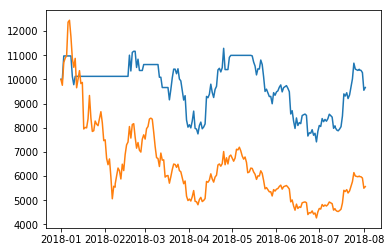

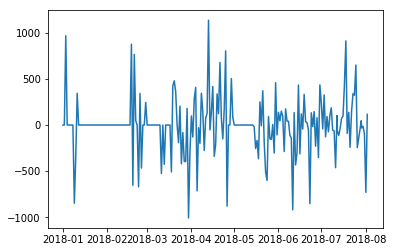

In [29]:
strats = stg_tf.StrategyTensorFlow(model_btc_eth, ini_pfo, ls_rule, '69-model.json', '69-model.h5', 'scaler.pkl')

report = strats.back_testing(BACK_TEST_START_DATE)


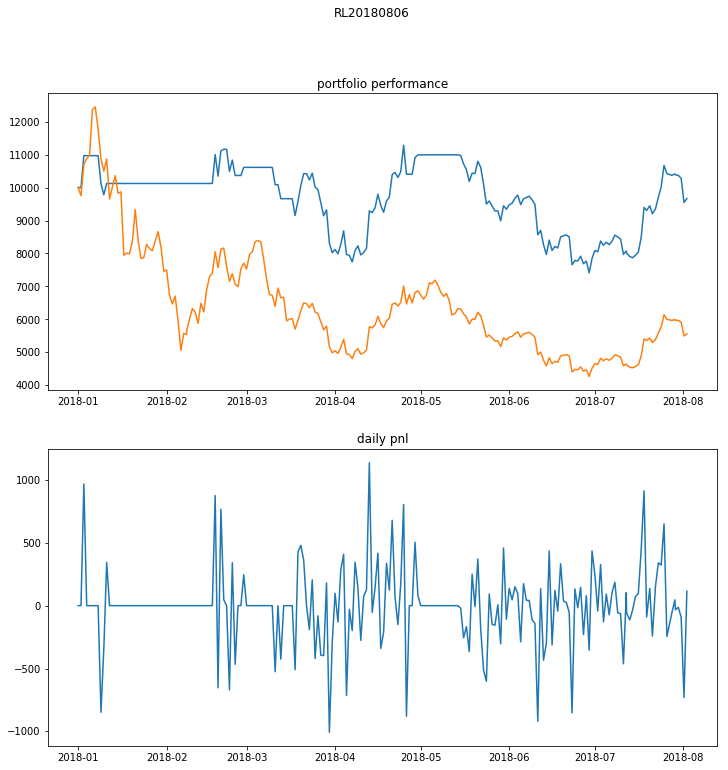

In [24]:
git

In [3]:
strats_train = stg_tf.StrategyTensorFlow(model_btc_eth, ini_pfo, ls_rule)

In [5]:
strats_train.train()

../cqt/strats/StrategyTensorFlow.py:151: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, kernel_initializer="lecun_uniform")`
  model.add(Dense(4, init='lecun_uniform'))
../cqt/strats/StrategyTensorFlow.py:243: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, batch_size=batchSize, nb_epoch=1, verbose=0)


debug final 21249.4252461451
Epoch #: 0 Reward: 21249.425246 Epsilon: 1.000000
Saved model to disk
debug final 53250.06585886635
Epoch #: 1 Reward: 53250.065859 Epsilon: 0.900000
Saved model to disk
debug final 8668.462491867786
Epoch #: 2 Reward: 8668.462492 Epsilon: 0.800000
Saved model to disk
debug final 12654.849739075988
Epoch #: 3 Reward: 12654.849739 Epsilon: 0.700000
Saved model to disk
debug final 41678.73532106159
Epoch #: 4 Reward: 41678.735321 Epsilon: 0.600000
Saved model to disk
debug final 23226.5159538636
Epoch #: 5 Reward: 23226.515954 Epsilon: 0.500000
Saved model to disk
debug final 23816.868489311582
Epoch #: 6 Reward: 23816.868489 Epsilon: 0.400000
Saved model to disk
debug final 49621.47807356157
Epoch #: 7 Reward: 49621.478074 Epsilon: 0.300000
Saved model to disk
debug final 48474.56541277929
Epoch #: 8 Reward: 48474.565413 Epsilon: 0.200000
Saved model to disk
debug final 21180.417511780004
Epoch #: 9 Reward: 21180.417512 Epsilon: 0.100000
Saved model to disk
